In [1]:
!pip install ket-lang
from ket import *


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Algoritmo de Busca de Grover
Esta seção aborda o Algoritmo de Grover, um algoritmo quântico que permite encontrar um elemento em uma lista não ordenada. Uma descrição mais rigorosa desse problema, bem como as alternativas clássicas para o mesmo são apresentadas neste texto. As referências utilizadas nesta parte são o livro \cite{book:icq_portugal}, capítulo 3, e as videoaulas U2.6 da subunidade SU4 do curso \cite{videolecture:qisI_p2}.
 
## Problema de Grover
  
O problema de Grover consiste em encontrar um elemento específico em uma lista de $2^n$ itens. A lista é formada por palavras binárias de $n$ dígitos. Há uma função booleana $f\colon \{ 0,1 \}^n \to \{ 0,1 \}$ que só sinaliza '1' para uma entrada $x_0$ em particular, que pode ser desconhecida. Em outras palavras, a função $f$ pode ser descrita por 

$$
             0 \ , \ x \neq x_0 \\
             1 \ , \  x = x_0 \ .
$$

  A maneira de saber se o item $x$ considerado corresponde ao desejado é por meio da aplicação de $f$. Essa função poderia ser chamada de ``teste'', e caso se queira saber se o item $x$ da lista é o desejado (em outras palavras, se $x = x_0$), deve-se fazer o teste em $x$ e ver se o teste resulta em '1' (item desejado foi encontrado) ou '0' (o item testado não é o desejado).
  
**Problema de Grover**

Encontrar a única entrada $x_0 \in  \{ 0,1 \}^n$ tal que o resultado do teste $f$ sinaliza '1'. Ou seja, encontrar único $x_0$ com 
  
  $$f(x_0) = 1 \ . $$
  

  Em seguida, um algoritmo quântico é apresentado para resolver o problema de forma mais eficiente do que seria possível classicamente. 
 
## Algoritmo de Grover
 
 O algoritmo de Grover é um algoritmo quântico para resolução do problema de Grover, que consiste em encontrar o elemento em uma lista por meio de um teste $f$, e o elemento desejado é o único $x_0$ que faz com que o teste sinalize 1. O algoritmo quântico consiste em aplicar uma subrotina quântica, o operador de Grover, por um número de vezes da ordem de $\sqrt{N}$, em que $N=2^n$ é o número de itens na lista, indexados por $n$ bits.
 
### Algoritmo de Grover

**Entrada:** $O_\text{F}(f) = O$ \ \ (oráculo de fase associado à função booleana $f$)

**Procedimento:**

  $$
\begin{array}{lll}
   \text{etapa 0:} & \ket{0}^{\otimes n} & \text{\small{preparação do estado inicial}} \\
   \text{etapa 1:} & H^{\otimes n}\ket{0}^{\otimes n} & \text{\small{superposição dos estados na base computacional}} \\
   \text{etapa 2:} & G & \text{\small{aplicação do operador de Grover}} \\
   \text{etapa 3:} & \text{\small{repetir etapa 2  por $k$ vezes, com}}  \\
                   & k = \dfrac{acos(\frac{1}{\sqrt{N}})}{acos(\frac{N-2}{N})} \ , \ \ N = 2^n \ .
   \end{array}
$$
   


$$
\begin{array}{lll}
   \text{etapa 1:} & O_\text{F}\ket{+}^{\otimes n} & \text{\small{aplicação de $f$ (oráculo de fase)}}  \\ 
   \text{etapa 2:} & H^{\otimes n} & \\
   \text{etapa 3:} &  2\ket{0}\bra{0} - I &  \\
   \text{etapa 4:} & H^{\otimes n} &  \\
  \end{array}
$$
  

**Saída:** Leitura do registrador fornece o item $x_0$ buscado, com probabilidade de acerto

   $$
   P_a >\frac{N-1}{N} , \ \ N = 2^n  \ .
   $$
   
### Circuito
Notação compacta

![circuito.png](https://raw.githubusercontent.com/evandro-crr/ket-book/refs/heads/main/book/algoritmos/images/Circuito.png)

### Notação auxiliar
  
Para facilitar, lista-se abaixo a notação utilizada nesse algoritmo:
     
   $$ \ket{0} = \ket{0 \ldots 0} = \ket{0}^{\otimes n} $$
   
   $$[ \ket{\psi} := \ket{+}^{\otimes n}  $$
   
   $$\mathbb{B}_n : \text{ conjunto de todas as palavras de $n$ bits} $$
   
   $$ N := 2^n \ \ \begin{cases}
                    \text{$n$: número de qubits de cada item da lista} \\
                    \text{$N$: número de itens na lista } 
                   \end{cases} 
    $$
    
   $$ 
   \ket{\alpha} := \sum_{\scriptsize \begin{array}{c} x \in \mathbb{B}_n \\ x \neq x_0 \end{array}} \frac{\ket{x}}{\sqrt{N-1}}
   $$
   
   $$ 
   \ket{\beta} := \ket{x_0} \text{: item desejado na lista} 
   $$
   
   $$
   S := \text{span}_\mathbb{R} \{ \ket{\alpha} , \ket{\beta} \} \text{: espaço vetorial gerado por $\ket{\alpha}$, $\ket{\beta}$ com escalares reais} 
   $$
 
### Contas auxiliares
   
Vale que:

$$
   \begin{split} 
       \ket{\psi} 
       &= \ket{+}^{\otimes n} \\
       &= \sum_{x \in \mathbb{B}_n} \frac{\ket{x}}{\sqrt{N}} \\
       &= \frac{\sqrt{N-1}}{\sqrt{N}} \sum_{\scriptsize \begin{array}{c} x \in \mathbb{B}_n \\ x \neq x_0 \end{array}} \frac{\ket{x}}{\sqrt{N-1}} \ \   + \  \  \frac{\ket{x_0}}{\sqrt{N}} \\
       &= \frac{\sqrt{N-1}}{\sqrt{N}} \ket{\alpha} + \frac{1}{\sqrt{N}} \ket{\beta}
      \end{split}
$$
      
A aplicação de $O_\text{F}$ em $\ket{\alpha}$ e $\ket{\beta}$ fica:
   
$$
   \begin{split}
    O_\text{F} \ket{\alpha} 
    &=  O_\text{F}\sum_{\scriptsize \begin{array}{c} x \in \mathbb{B}_n \\ x \neq x_0 \end{array}} \frac{\ket{x}}{\sqrt{N-1}}  \\
    &= \sum_{\scriptsize \begin{array}{c} x \in \mathbb{B}_n \\ x \neq x_0 \end{array}}\frac{1}{\sqrt{N-1}} O_\text{F}\ket{x} \\
    &= \sum_{\scriptsize \begin{array}{c} x \in \mathbb{B}_n \\ x \neq x_0 \end{array}}\frac{1}{\sqrt{N-1}} \ket{x} \\
    &= \ket{\alpha}  \ , 
   \end{split}
$$
   
$$ 
\begin{split}
        O_\text{F} \ket{\beta} 
        &=  O_\text{F} \ket{x_0}  \\
        &=  - \ket{x_0} \\
        &= - \ket{\beta} \ .
      \end{split}
$$
      
O operador $G$ pode ser escrito como:

$$ 
\begin{split}
        G 
        &= H^{\otimes n} (2\ket{0}\bra{0} - I) H^{\otimes n} O_\text{F} \\
        &= \big(2H^{\otimes n}\ket{0}\bra{0}H^{\otimes n} - H^{\otimes n}I H^{\otimes n}  \big)O_\text{F} \\
        &= \big(2H^{\otimes n}\ket{0}\bra{0}(H^{\otimes n})^\dagger - H^{\otimes n} H^{\otimes n}  \big)O_\text{F} \\
        &= (2\ket{\psi}\bra{\psi} - I) O_\text{F} \ ,
       \end{split}
$$
  
   em que foi definido $\ket{\psi} = \ket{+}^{\otimes n}$. 

### Primeira aplicação do operador $G$

   Antes de aplicar o operador $G$ pela primeira vez, prepara-se o estado inicial fazendo uma superposição com pesos iguais em cada qubit:
   
$$
\begin{split}
    \ket{\psi_0} 
    &= H^{\otimes n} \ket{0}^{\otimes n} \\
    &= \ket{+}^{\otimes n} \\
    &= \ket{\psi} \\
    &=  \frac{\sqrt{N-1}}{\sqrt{N}} \ket{\alpha} + \frac{1}{\sqrt{N}} \ket{\beta}  \ \ \text{usando ($\psi$)} \ . \\
   \end{split} 
$$

   Nota-se que $ \ket{\psi_0}$ pertence ao subespaço vetorial $S$ gerado por $\ket{\alpha},\ket{\beta}$ e com escalares reais. Isso permitirá uma interpretação geométrica muito útil para o entendimento do algoritmo. 
   
   Na etapa 1 de $G$, aplica-se o oráculo de fase ao estado inicial $\ket{\psi}$:
   
   $$
\begin{split}
       \ket{\psi_1} 
       &= O_\text{F} \ket{\psi_0} \\
       &= O_\text{F} \left( \frac{\sqrt{N-1}}{\sqrt{N}} \ket{\alpha} + \frac{1}{\sqrt{N}} \ket{\beta}  \right) \ \ \text{usando ($\psi$)} \\
       &= \frac{\sqrt{N-1}}{\sqrt{N}} O_\text{F} \ket{\alpha} + \frac{1}{\sqrt{N}} O_\text{F} \ket{\beta} \\
       &= \frac{\sqrt{N-1}}{\sqrt{N}} \ket{\alpha} - \frac{1}{\sqrt{N}} \ket{\beta}  \ \ \text{usando ($\alpha$) e ($\beta$)}
      \end{split}  
$$

   O vetor $\ket{\psi_1}$ continua no espaço $S$, e a aplicação do oráculo de fase pode ser visualizada como uma reflexão em torno do eixo $\ket{\alpha}$.

![primeiraapl.png](https://raw.githubusercontent.com/evandro-crr/ket-book/refs/heads/main/book/algoritmos/images/Aplicacao1deg.png)
  
   As etapas 2, 3 e 4 de $G$ redundam em aplicar $2 \ket{\psi}\bra{\psi} - I$ em $ \ket{\psi_1} $, conforme equação ($G$). E a aplicação desse operador pode ser vista geometricamente de acordo com a figura abaixo.
   
$$
 \begin{split}
       \ket{\psi_2} 
       &= (2 \ket{\psi}\bra{\psi} - I) \ket{\psi_1} \\
       &= 2 \ket{\psi}\bra{\psi}\ket{\psi_1} - \ket{\psi_1}
      \end{split}
$$

![geometria.png](https://raw.githubusercontent.com/evandro-crr/ket-book/refs/heads/main/book/algoritmos/images/Geometria_aplicacao.png)
   
Dessa forma, a primeira aplicação do operador $G$ fornece o seguinte.

![primeira_aplicacao.png](https://raw.githubusercontent.com/evandro-crr/ket-book/refs/heads/main/book/algoritmos/images/Duas_aplicacoesG.png)
     
### Aplicações subsequentes do operador $G$
  
As aplicações sucessivas do operador de Grover têm o mesmo efeito descrito anteriormente. Cada aplicação de $G$ corresponde a uma rotação no sentido anti-horário. A figura a seguir ilustra a $l$-ésima aplicação de $G$.
   
![aplicacoessuce.png](https://raw.githubusercontent.com/evandro-crr/ket-book/refs/heads/main/book/algoritmos/images/Aplicacoes_sucessivas.png)
   
   O operador $G$ é aplicado por $k$ vezes até que o vetor resultante esteja o mais próximo possível do eixo $\ket{\beta}$.

![kapli.png](https://raw.githubusercontent.com/evandro-crr/ket-book/refs/heads/main/book/algoritmos/images/k_aplicacoes.png)
   
   No livro \cite{book:icq_portugal}, seção 3.3, demonstra-se algebricamente que uma aplicação de $G$ produz uma rotação em sentido horário de um mesmo ângulo $\theta$. 
   
### Número necessário de aplicações de $G$
 
   O número de aplicações $k$ necessário é dado por 
   
$$
 k \theta + \frac{\theta}{2} = \frac{\pi}{2} \implies k = \frac{\pi - \theta}{2\theta} \ , 
 $$
 
   em que se arredonda $k$ para o inteiro mais próximo. 
   
   O ângulo $\theta$ (em radianos) é o ângulo que $G\ket{\psi}$ faz com $\ket{\psi}$. Pode ser obtido por (ver figura \ref{cap5:fig_aplicacao_G_em_psi}):
   
$$
 \begin{split}
      \cos \frac{\theta}{2} 
      &= \braket{\beta}{\psi} = \frac{\sqrt{N-1}}{\sqrt{N}} \qquad \text{usando ($\psi$)} \\
      \sin \frac{\theta}{2} 
      &= \sqrt{1 - |\braket{\beta}{\psi}}^2| = \frac{1}{\sqrt{N}} 
     \end{split} 
$$
      
   Fazendo-se a seguinte manipulação algébrica, pode-se encontrar outra expressão equivalente para o ângulo.
   
$$
 \begin{split} 
       \ket{\psi_1} 
   &=  \frac{\sqrt{N-1}}{\sqrt{N}} \ket{\alpha} - \frac{1}{\sqrt{N}} \ket{\beta}  \\
   &=  \frac{\sqrt{N-1}}{\sqrt{N}} \ket{\alpha} + \frac{1}{\sqrt{N}} \ket{\beta} -  \frac{2}{\sqrt{N}} \ket{\beta} \\
   &= \ket{\psi} - \frac{2}{\sqrt{N}} \ket{\beta}   \qquad \text{usando ($\psi$)} \phantom{xxxxxxxxxxxxxxxxx}
      \end{split} 
      $$
      
$$
\begin{split}
       \ket{\psi_2} 
       &= G \ket{\psi} \\
       &= \big( 2 \ket{\psi}\bra{\psi} - I \big)\ket{\psi_1} \\
       &= \big( 2 \ket{\psi}\bra{\psi} - I \big)\left( \ket{\psi} - \frac{2}{\sqrt{N}}\ket{\beta} \right) \\
       &= 2\ket{\psi}\braket{\psi}{\psi} - \ket{\psi} - \frac{4}{\sqrt{N}}\ket{\psi}\braket{\psi}{\beta} + \frac{2}{\sqrt{N}}\ket{\beta} \\
       &= 2\ket{\psi} - \ket{\psi} - \frac{4}{\sqrt{N}} \frac{1}{\sqrt{N}}\ket{\psi} + \frac{2}{\sqrt{N}}\ket{\beta}  \qquad \text{usando ($\psi$)} \\
       &= \frac{N-4}{N} \ket{\psi} + \frac{2}{\sqrt{N}}\ket{\beta}  \\
 %      &= \frac{N-4}{N} \left( \frac{\sqrt{N-1}}{\sqrt{N}} \ket{\alpha} + \frac{1}{\sqrt{N}} \ket{\beta} \right)  + \frac{2}{\sqrt{N}}\ket{\beta} \\
 %      &=  \frac{(N-4)\sqrt{N-1}}{N\sqrt{N}}\ket{\alpha} + \frac{N-2}{N\sqrt{N}} \ket{\beta}
      \end{split} 
$$

$$
\begin{split}
       \cos \theta 
       &= \braket{\psi}{G\psi} \\
       &= \bra{\psi}  \left(\frac{N-4}{N} \ket{\psi} + \frac{2}{\sqrt{N}}\ket{\beta} \right) \\
   %    & \qquad \qquad \qquad \text{usando ($\ast$)} \\
       &= \frac{N-4}{N} \braket{\psi}{\psi} + \frac{2}{\sqrt{N}}\braket{\psi}{\beta} \\
       &= \frac{N-4}{N} + \frac{2}{\sqrt{N}}\frac{1}{\sqrt{N}} \qquad \text{usando ($\psi$)} \\
       &= \frac{N-2}{N} \ . % \phantom{xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxi}
      \end{split}
$$
   
Portanto, pode-se escrever

$$
 \theta = 2acos(\frac{\sqrt{N-1}}{\sqrt{N}}) = 2asin(\frac{1}{\sqrt{N}}) = acos(\frac{N-2}{N}) \ ,
 $$
 
   e o valor de $k$ é dado por
   
$$
 k = \frac{\pi - \theta}{2\theta} = \frac{\pi - acos(\frac{N-2}{N})}{2acos(\frac{N-2}{N})}
 $$
 
   ou por 
   
$$
 k = \frac{\frac{\pi}{2} - \frac{\theta}{2}}{\theta} = \frac{\frac{\pi}{2} - asin(\frac{1}{\sqrt{N}})}{acos(\frac{N-2}{N}) } = \frac{acos(\frac{1}{\sqrt{N}})}{acos(\frac{N-2}{N})} \ .
$$
   
   É possível verificar que o número $k$ é da ordem de $\sqrt{N}$. De acordo com \cite{book:icq_portugal}, p.56, tem-se
   
   $$ 
   \lim_{N\to +\infty} k = +\infty 
   $$
   
   $$ 
   \lim_{N\to +\infty} \frac{k}{\sqrt{N}} = \frac{\pi}{4} 
   $$
   
   $$ 
   \lim_{N\to +\infty} \frac{k}{N} = 0 \ . 
   $$
    
### Probabilidade de acerto
   
   Ao aplicar a subrotina $G$ por um número $k$ de vezes especificado anteriormente, obtém-se o estado final o mais próximo possível de $\ket{\beta} = \ket{x_0}$, o item desejado. A projeção na direção desse vetor permite encontrar a probabilidade de acerto do algoritmo. O estado final $G^k \ket{\psi}$ faz um ângulo com o estado $\ket{x_0}$ menor que $\theta/2$, pois se fosse maior ou igual, seria possível aplicar novamente o operador $G$ para reduzi-lo. Portanto, o ângulo $\cos \theta\big(\ket{x_0},G^k\ket{\psi}\big)$ entre o estado desejado e o estado final é menor que $\theta/2$, o que significa que seu cosseno é maior que $\cos (\theta/2)$. 

![projec.png](https://raw.githubusercontent.com/evandro-crr/ket-book/refs/heads/main/book/algoritmos/images/projecao_de_g.png)

   Com isso, tem-se a probabilidade de acerto estimada em
   
$$
\begin{split}
        P_a 
        &= ||\ket{x_0}\bra{x_0}G^k \ket{\psi}||^2 \\
        &= |\braket{x_0}{G^k\ket{\psi}}|^2  \\
        &= |\cos \theta\big(\ket{x_0},G^k\ket{\psi}\big)|^2 \\
        &> |\cos \theta/2|^2 \\
        &= \left(\frac{\sqrt{N-1}}{\sqrt{N}}\right)^2 \\
        &= \frac{N-1}{N} \ , \ \ N = 2^n \ .
      \end{split}
$$

### Generalização
   
   O algoritmo de Grover também funciona para o caso em que há mais de um elemento marcado, isto é, há $x_0$, $x_1$, $\ldots$, $x_{m-1}$ elementos tais que $f(x_0) = f(x_1) = \ldots = f(x_{m-1})$ e os demais valores anulam $f$. É possível adaptar a análise do algoritmo para esse caso. A interpretação geométrica continua valendo, mas desta vez, tem-se
   
  $$ 
  \ket{\alpha} = \frac{1}{\sqrt{N-m}} \sum_{\scriptsize \begin{array}{c} x \in \mathbb{B}_n \\ f(x) = 0 \end{array} } \ket{x} 
  $$
  
  $$ 
  \ket{\beta} = \frac{1}{\sqrt{m}} \sum_{\scriptsize \begin{array}{c} x \in \mathbb{B}_n \\ f(x) = 1 \end{array} } \ket{x} \ . 
  $$
   
## Algoritmo Clássico
 
### Algoritmo Clássico Determinístico
 
   Classicamente, se o teste é dado como uma caixa preta, em que não se sabe a estrutura interna de $f$, a maneira de se encontrar $x_0$ é por busca exaustiva.
   Para garantir que o item $x_0$ seja encontrado, deve-se, no pior caso, olhar todas as $N = 2^n$ entradas possíveis. Portanto são necessários $N$ aplicações do teste $f$. 
   
### Algoritmo Clássico Probabilístico
   
   Considere um algoritmo que sorteie aleatoriamente as entradas a serem testadas (e sem repetir entradas). Após o teste de $k$ entradas, a probabilidade de que se tenha localizado o item desejado $x_0$ é de 
   
   $$ 
   P = \frac{k}{N} \ . 
   $$
   
   Para que haja probabilidade de encontrar a resposta seja maior que $1/2$, deve-se testar pelo menos por um número de vezes 

$$
  k > \frac{N}{2} \ . 
$$
   
   Desse modo, ainda deve-se aplicar o teste $f$ da ordem de $N$ vezes. 
   

 \begin{subsection}{Comparação de Desempenho}  
   O desempenho dos algoritmos são comparados na tabela abaixo.
   
![desmepnho.png](https://raw.githubusercontent.com/evandro-crr/ket-book/refs/heads/main/book/algoritmos/images/Desempenho.png)
  
  Dessa forma, o algoritmo de Grover apresentaria ganho quadrático de desempenho em relação aos algoritmos clássicos, se a aplicação de $f$ nos casos clássico e quântico forem equivalentes em termos de custos computacionais. 

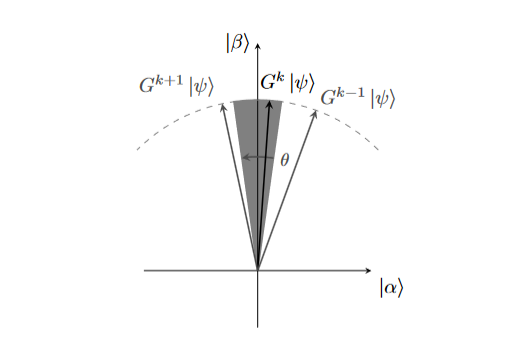
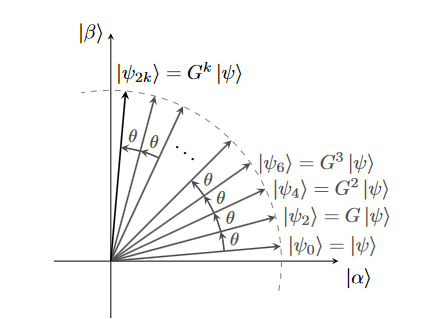
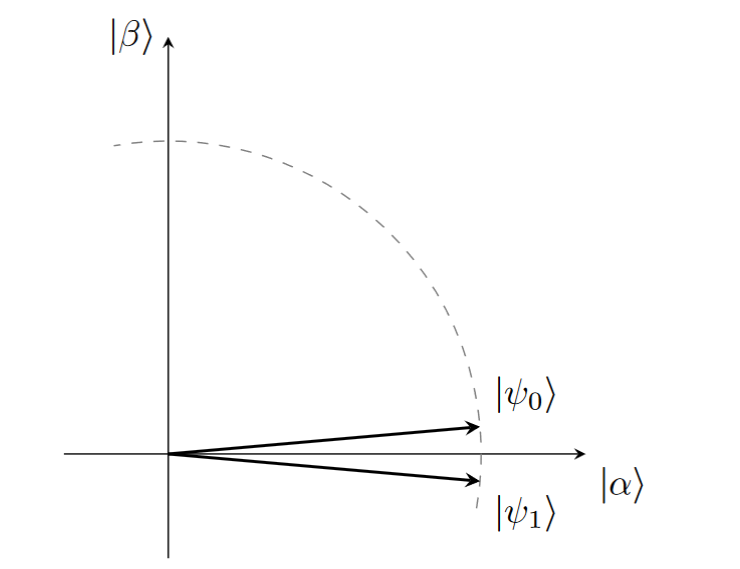
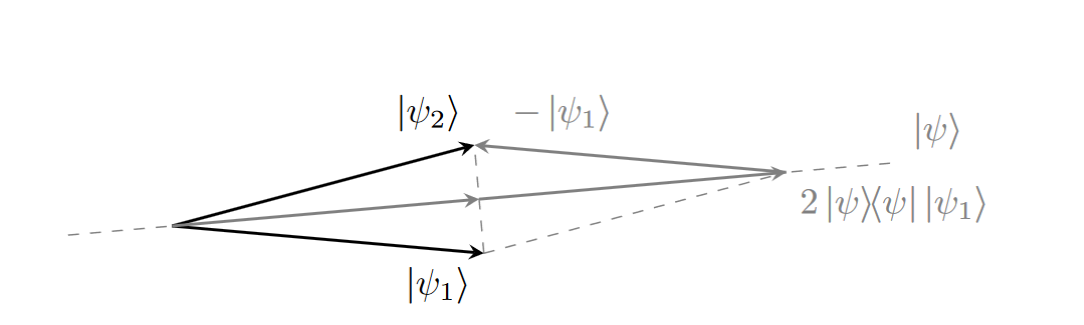
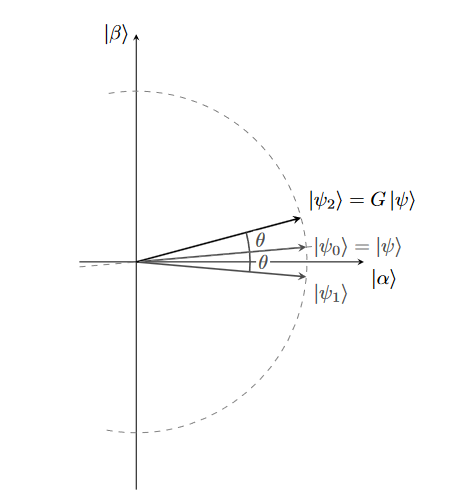
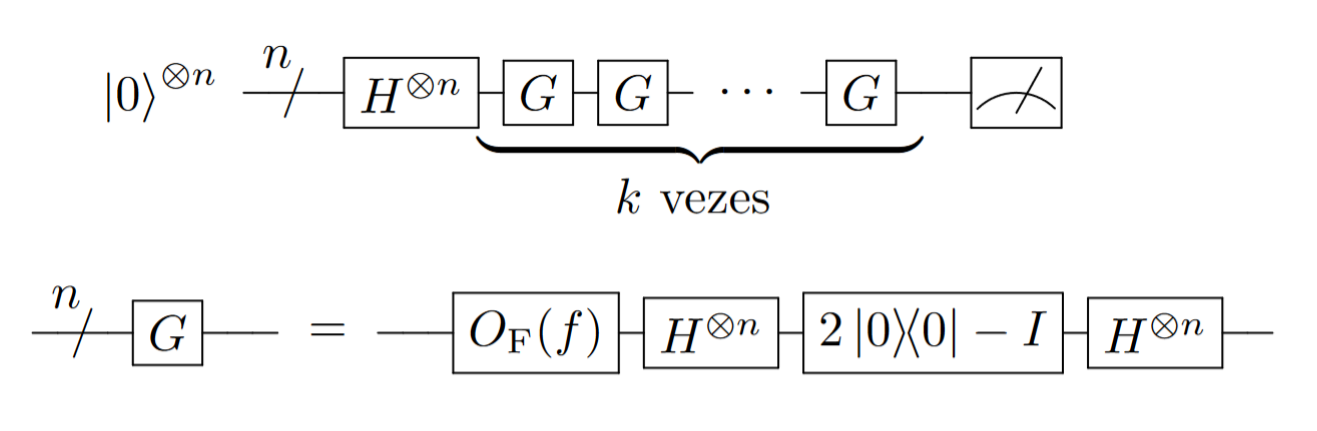
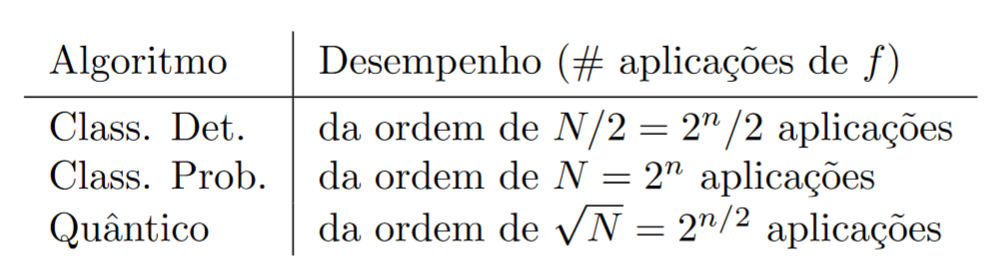
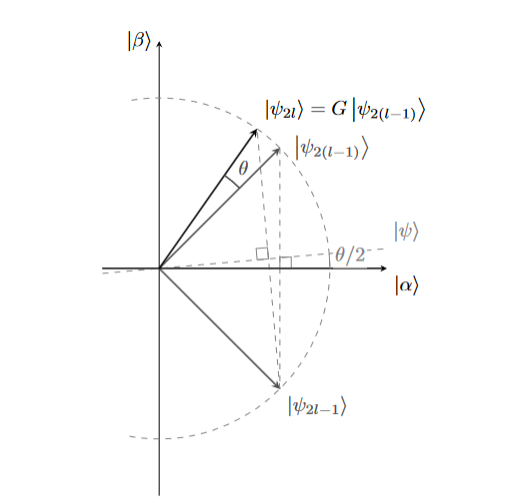

## Simulação do algorítimo de Grover

Para simular o algorítimo de Grover usaremos a línguagem Ket de computação quântica, para isso precisamos ter a mesma instalada, caso não possua o pacote instalado rode o seguinte código:

```python
pip install ket-lang
```

Com a biblioteca instalada, importa-se a mesma para ser usada dentro do seu código:

In [2]:
from ket import *

Primeiro iremos inicializar o oráculo:

In [3]:
def oracle(qubits, target):
    """Oráculo: inverte a amplitude do estado desejado."""
    X(
        qubits[i]
        for i, bit in enumerate(bin(target)[2:].zfill(len(qubits)))
        if bit == "0"
    )
    H(qubits[-1])
    ctrl(qubits[:-1], X, qubits[-1])  # Controle multi-qubit
    H(qubits[-1])
    X(
        qubits[i]
        for i, bit in enumerate(bin(target)[2:].zfill(len(qubits)))
        if bit == "0"
    )

Em seguida o operador de difusão

In [5]:
def diffusion_operator(qubits):
    """Operador de difusão: amplifica as amplitudes dos estados marcados."""
    H(qubits)
    X(qubits)
    H(qubits[-1])
    ctrl(qubits[:-1], X, qubits[-1])  # Controle multi-qubit
    H(qubits[-1])
    X(qubits)
    H(qubits)

Por fim aplicamos o algorítimo de Grover utilizando-se das portas quânticas já conhecidas, do oráculo e do operador de difusão:

In [7]:
def grover(n, target):
    """Executa o algoritmo de Grover."""
    # Inicialização do processo
    process = Process()

    # Alocação de n qubits
    qubits = process.alloc(n)

    # Superposição inicial
    H(qubits)

    # Número ideal de iterações: sqrt(2^n)
    iterations = int((2**n) ** 0.5)

    # Iterações do algoritmo de Grover
    for _ in range(iterations):
        oracle(qubits, target)
        diffusion_operator(qubits)

    # Medição
    result = [measure(q).value for q in qubits]
    print("Estado encontrado:", result)